In [ ]:
#Python Script to pull sensor data

In [13]:
import requests
import csv
def fetch_sensor_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for request errors
        csv_data = response.text
        sensor_data = list(csv.DictReader(csv_data.splitlines()))
        return sensor_data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching sensor data: {e}")
        return None
# Example
sensor_url = 'https://example.com/sensor_data.csv'
data = fetch_sensor_data(sensor_url)
if data:
    for entry in data:
        print(entry)


Error fetching sensor data: 404 Client Error: Not Found for url: https://example.com/sensor_data.csv


In [ ]:
#3.To design and provide encrypting data before analysis

In [1]:
from cryptography.fernet import Fernet #for symmetric key encryption algorithm
key = Fernet.generate_key() #for encryption and decryption
cipher_suite = Fernet(key) #fro encrypting and decrypting operations by generating fernet key
# Encrypt a message here in inverted commas or the data I have to encrypt
message = b"Hello, this is a secret message."
cipher_text = cipher_suite.encrypt(message)
print("Encrypted Message:", cipher_text)


Encrypted Message: b'gAAAAABl0zQNOXDyDcvyz9nm9OlQAI1TirBf2egnCthTQxzV34OycFIjTeIlQVhWEIixwQXZopsD6r5uJ6Q9dNwigCn5Z9I8wact2JWYu6eUNnxftFko7levszHslhEBC2AnfbhhvmYv'


In [2]:
decrypted_text = cipher_suite.decrypt(cipher_text)
print("Decrypted Message:", decrypted_text.decode())


Decrypted Message: Hello, this is a secret message.


In [3]:
print("Original Message:", message)


Original Message: b'Hello, this is a secret message.'


In [4]:
#Develop  dashboards for overall health statistics 

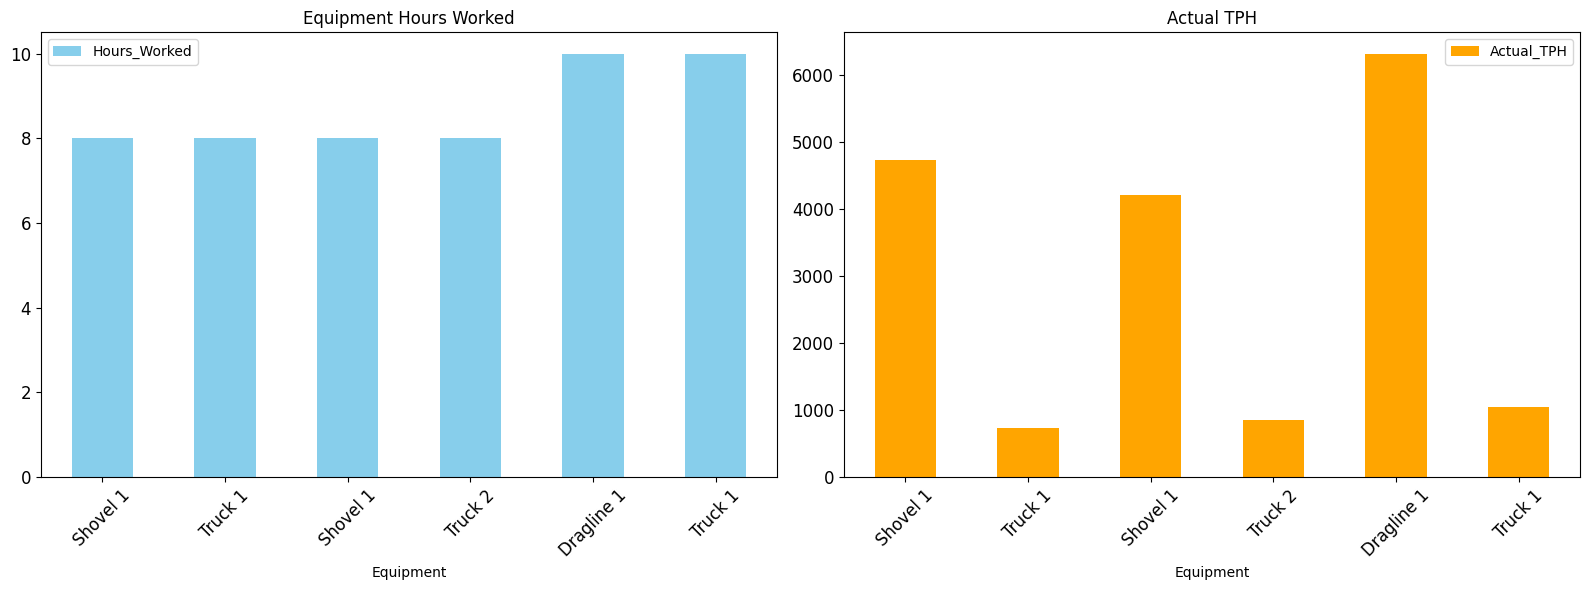

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load CSV data
df_equipment = pd.read_csv('M12.csv')
# Convert 'Hours_Worked' and 'Actual_TPH' columns to numeric
try:
    df_equipment['Hours_Worked'] = pd.to_numeric(df_equipment['Hours_Worked'], errors='coerce')
    df_equipment['Actual_TPH'] = pd.to_numeric(df_equipment['Actual_TPH'], errors='coerce')
except Exception as e:
    print(f"Error during conversion: {e}")
# Filter out rows where 'Hours_Worked' is missing
df_equipment_with_hours_worked = df_equipment.dropna(subset=['Hours_Worked'])
# Equipment Health Dashboard for Hours Worked
try:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    df_equipment_with_hours_worked.plot(kind='bar', x='Equipment', y='Hours_Worked', ax=axes[0], title='Equipment Hours Worked', fontsize=12, rot=45, color='skyblue')
    # Filter out rows where 'Actual_TPH' is missing
    df_equipment_with_actual_tph = df_equipment.dropna(subset=['Actual_TPH'])
    # Equipment Health Dashboard for Actual TPH
    df_equipment_with_actual_tph.plot(kind='bar', x='Equipment', y='Actual_TPH', ax=axes[1], title='Actual TPH', fontsize=12, rot=45, color='orange')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")


In [ ]:
#Set up Jupyter Notebook for manipulating time series data frames using Pandas

In [6]:
import pandas as pd
csv_file_path = 'M12.csv'
df = pd.read_csv(csv_file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df)



                         Mine   Equipment    Material  Shift         Operator  \
Date                                                                            
2023-01-01  Vasanth Coal Mine    Shovel 1  Overburden    Day     Ramesh Patel   
2023-01-01  Vasanth Coal Mine     Truck 1        Coal    Day  Aditya Deshmukh   
2023-01-02    Reddy Coal Mine    Shovel 1  Overburden  Night      Vijay Kumar   
2023-01-02    Reddy Coal Mine     Truck 2        Coal  Night     Priya Sharma   
2023-01-05        RP Minerals  Dragline 1  Overburden    Day       Rahul Jain   
2023-01-05        RP Minerals     Truck 1        Coal    Day      Ankit Desai   

                       Address  Hours_Worked  Target_TPH  Actual_TPH  
Date                                                                  
2023-01-01  221B Baker Street              8        5000        4735  
2023-01-01      50 Laxmi Nagar             8         800         725  
2023-01-02  144 Golf Club Road             8        5000        421

In [7]:
import pandas as pd
csv_file_path = 'M9.csv'
df = pd.read_csv(csv_file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df)

                      MineName     Material  NoOfBlasts ExplosivesUsed  \
Date                                                                     
2023-03-10  Hindustan Zinc Ltd  Zinc/Silver           3         9375kg   

            OverburdenRemoved     OreAccessible  
Date                                             
2023-03-10  156000 metric ton  32500 metric ton  


In [8]:
import pandas as pd
csv_file_path = 'M4.csv'
df = pd.read_csv(csv_file_path)
df.set_index('Date', inplace=True)
print(df)

         LoaderID          Operator  Material  LoadsCompleted AvgLoadTime  \
Date                                                                        
1-Mar-23    L-101  Rahul Srivastava  Iron Ore              10      15 min   
2-Mar-23    L-102  Deepika Padukone  Iron Ore              10      18 min   

         TotalLoadTime  
Date                    
1-Mar-23       150 min  
2-Mar-23       180 min  


In [9]:
import pandas as pd
csv_file_path = 'M1.csv'
df = pd.read_csv(csv_file_path)
df.set_index('Date', inplace=True)
print(df)

            BlockID BlastsDone     ExplosivesUsed OverburdenRemoved  \
Date                                                                  
13-Feb-23   A1-east    3 blast       4500 kg ANFO        96000 T OB   
15-Feb-23  B7-south    2 blast   2100 kg emulsion        45000 T OB   

          OreExtracted   
Date                     
13-Feb-23   35800 T ore  
15-Feb-23   18250 T ore  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6 non-null      datetime64[ns]
 1   Mine          6 non-null      object        
 2   Equipment     6 non-null      object        
 3   Material      6 non-null      object        
 4   Shift         6 non-null      object        
 5   Operator      6 non-null      object        
 6   Address       6 non-null      object        
 7   Hours_Worked  6 non-null      int64         
 8   Target_TPH    6 non-null      int64         
 9   Actual_TPH    6 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 612.0+ bytes


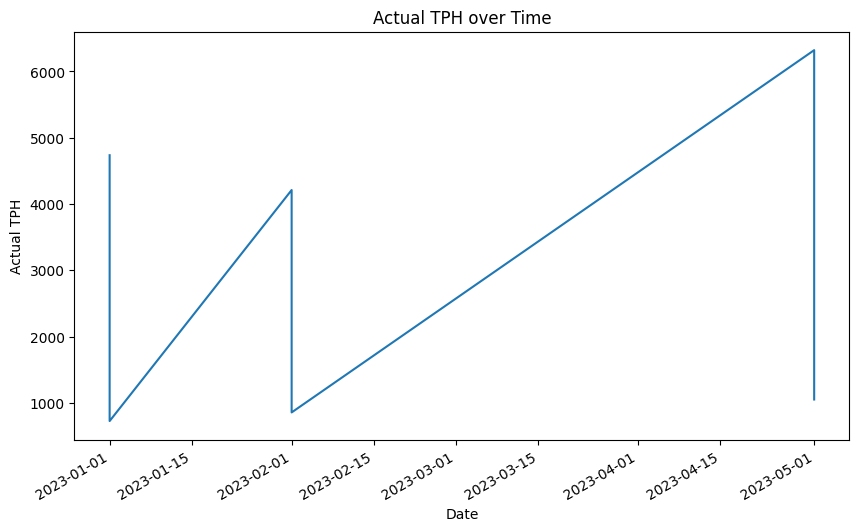

In [10]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
# Read the Data
df = pd.read_csv('M12.csv', parse_dates=['Date'], dayfirst=True)
# Explore the Data
df.head()  # Display the first few rows
df.info()  # Get information about the DataFrame
# Manipulate Time Series Data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Visualize Data
df['Actual_TPH'].plot(figsize=(10, 6), title='Actual TPH over Time')
plt.xlabel('Date')
plt.ylabel('Actual TPH')
plt.show()

In [ ]:
#8.Enhance Python ETL process 

In [11]:
import pandas as pd
df = pd.read_csv('M12.csv')
df['Hours_Worked'] = pd.to_numeric(df['Hours_Worked'], errors='coerce')
df['Efficiency'] = df['Actual_TPH'] / df['Target_TPH'] * 100
print(df)


       Date               Mine   Equipment    Material  Shift  \
0  1/1/2023  Vasanth Coal Mine    Shovel 1  Overburden    Day   
1  1/1/2023  Vasanth Coal Mine     Truck 1        Coal    Day   
2  1/2/2023    Reddy Coal Mine    Shovel 1  Overburden  Night   
3  1/2/2023    Reddy Coal Mine     Truck 2        Coal  Night   
4  1/5/2023        RP Minerals  Dragline 1  Overburden    Day   
5  1/5/2023        RP Minerals     Truck 1        Coal    Day   

          Operator             Address  Hours_Worked  Target_TPH  Actual_TPH  \
0     Ramesh Patel  221B Baker Street              8        5000        4735   
1  Aditya Deshmukh      50 Laxmi Nagar             8         800         725   
2      Vijay Kumar  144 Golf Club Road             8        5000        4210   
3     Priya Sharma           multiline             8         800         855   
4       Rahul Jain  G-13 Govt. Complex            10        7000        6320   
5      Ankit Desai       B-302 Solaris            10         900

In [ ]:
#